In [13]:
import pandas as pd

dataset=pd.read_csv('AAPL_data.csv').values

In [14]:
open_value=dataset[:,1]

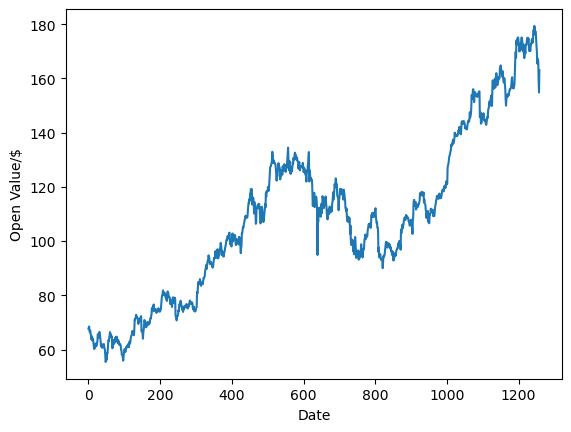

In [15]:
from matplotlib import pyplot as plt

plt.plot(open_value)
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.show()

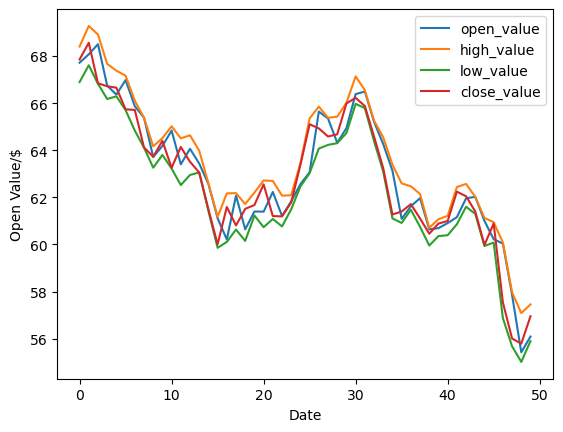

In [16]:
high_value=dataset[:,2]
low_value=dataset[:,3]
close_value=dataset[:,4]

plt.plot(open_value[:50],label='open_value')
plt.plot(high_value[:50],label='high_value')
plt.plot(low_value[:50],label='low_value')
plt.plot(close_value[:50],label='close_value')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.show()

In [17]:
print(open_value[:100])

[67.7142 68.0714 68.5014 66.7442 66.3599 66.9785 65.8714 65.3842 63.7142
 64.1785 64.8356 63.4028 64.0614 63.4357 62.5714 61.1142 60.2114 62.0728
 60.6428 61.3999 61.3928 62.2285 61.2071 61.8328 62.5614 63.0642 65.6428
 65.3456 64.3171 64.9399 66.3842 66.4914 65.2085 64.2599 63.1285 61.0857
 61.6242 61.9657 60.6428 60.6928 60.9085 61.1571 61.9599 62.0214 60.9999
 60.2242 60.0385 57.8557 55.4242 56.0914 57.7128 56.2199 58.7464 58.5442
 60.0642 62.1571 63.4942 63.1114 64.4728 65.1014 66.4242 65.5771 65.6871
 65.4242 64.5014 64.8356 62.7371 60.4628 62.7214 61.7014 62.5928 63.4357
 62.2785 62.9785 64.2714 62.8571 63.6642 64.6428 64.3899 64.7456 63.6642
 63.6385 62.3571 63.5328 62.2485 62.7857 61.7857 62.1999 61.6342 61.6514
 61.6285 59.8999 59.7842 58.1999 57.9571 57.6999 57.0357 55.9085 57.5271
 58.5657]


In [18]:
open_value=open_value.reshape(-1,1)
print(open_value[:100])

[[67.7142]
 [68.0714]
 [68.5014]
 [66.7442]
 [66.3599]
 [66.9785]
 [65.8714]
 [65.3842]
 [63.7142]
 [64.1785]
 [64.8356]
 [63.4028]
 [64.0614]
 [63.4357]
 [62.5714]
 [61.1142]
 [60.2114]
 [62.0728]
 [60.6428]
 [61.3999]
 [61.3928]
 [62.2285]
 [61.2071]
 [61.8328]
 [62.5614]
 [63.0642]
 [65.6428]
 [65.3456]
 [64.3171]
 [64.9399]
 [66.3842]
 [66.4914]
 [65.2085]
 [64.2599]
 [63.1285]
 [61.0857]
 [61.6242]
 [61.9657]
 [60.6428]
 [60.6928]
 [60.9085]
 [61.1571]
 [61.9599]
 [62.0214]
 [60.9999]
 [60.2242]
 [60.0385]
 [57.8557]
 [55.4242]
 [56.0914]
 [57.7128]
 [56.2199]
 [58.7464]
 [58.5442]
 [60.0642]
 [62.1571]
 [63.4942]
 [63.1114]
 [64.4728]
 [65.1014]
 [66.4242]
 [65.5771]
 [65.6871]
 [65.4242]
 [64.5014]
 [64.8356]
 [62.7371]
 [60.4628]
 [62.7214]
 [61.7014]
 [62.5928]
 [63.4357]
 [62.2785]
 [62.9785]
 [64.2714]
 [62.8571]
 [63.6642]
 [64.6428]
 [64.3899]
 [64.7456]
 [63.6642]
 [63.6385]
 [62.3571]
 [63.5328]
 [62.2485]
 [62.7857]
 [61.7857]
 [62.1999]
 [61.6342]
 [61.6514]
 [61.6285]

In [19]:
open_value=open_value.reshape(-1,1) #convering into a column vector

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
scaled_open_value=scaler.fit_transform(open_value)

print(open_value[:5].T)
print(scaled_open_value[:5].T)

[[67.7142 68.0714 68.5014 66.7442 66.3599]]
[[0.09915624 0.10203815 0.10550741 0.09133024 0.08822969]]


In [20]:
import joblib

joblib.dump(scaler,'stock-scaler.sav')

['stock-scaler.sav']

In [21]:
open_value.shape

(1259, 1)

In [22]:
data=[]
target=[]

window_size=50

for i in range(0,len(open_value)-window_size):
    data.append(scaled_open_value[i:i+window_size])
    target.append(scaled_open_value[i+window_size])

In [23]:
import numpy as np

data_np=np.array(data)
target_np=np.array(target)

print(data_np.shape)
print(target_np.shape)

(1209, 50, 1)
(1209, 1)


In [24]:
np.save('data',data)
np.save('target',target)